In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [7]:
# Load Data
crop_data = pd.read_csv("Crop_recommendation.csv")  # Crop recommendation dataset
fertilizer_data = pd.read_csv("Fertilizer_Prediction.csv")  # Fertilizer recommendation dataset
yield_data = pd.read_csv("yield_df.csv")  # Crop yield prediction dataset

In [ ]:
print(fertilizer_data.head(5))

   Temparature  Humidity   Moisture  Soil Type  Crop Type  Nitrogen  \
0           26         52        38          4          3        37   
1           29         52        45          2          8        12   
2           34         65        62          0          1         7   
3           32         62        34          3          9        22   
4           28         54        46          1          6        35   

   Potassium  Phosphorous  Fertilizer Name  
0          0            0                6  
1          0           36                5  
2          9           30                1  
3          0           20                4  
4          0            0                6  


In [ ]:
print(crop_data.shape)

(2200, 8)


In [ ]:
print(fertilizer_data.shape)

(99, 9)


In [8]:
# Initialize separate encoders for each column
soil_type_le = LabelEncoder()
crop_type_le = LabelEncoder()
fertilizer_name_le = LabelEncoder()

# Apply LabelEncoder to each categorical column
fertilizer_data['Soil Type'] = soil_type_le.fit_transform(fertilizer_data['Soil Type'])
fertilizer_data['Crop Type'] = crop_type_le.fit_transform(fertilizer_data['Crop Type'])
fertilizer_data['Fertilizer Name'] = fertilizer_name_le.fit_transform(fertilizer_data['Fertilizer Name'])

# For crop data
crop_le = LabelEncoder()
crop_data['label'] = crop_le.fit_transform(crop_data['label'])

# For yield data
yield_le = LabelEncoder()
yield_data['Item'] = yield_le.fit_transform(yield_data['Item'])


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import pandas as pd

# Features and target
X_rf = crop_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y_rf = crop_data['label']

# Train-test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Apply SMOTE
smote_rf = SMOTE(random_state=42)
X_train_smote_rf, y_train_smote_rf = smote_rf.fit_resample(X_train_rf, y_train_rf)

# Add Gaussian noise
noise_factor_rf = 0.01
X_train_smote_noisy_rf = X_train_smote_rf + noise_factor_rf * np.random.randn(*X_train_smote_rf.shape)

# Convert to DataFrame
X_train_smote_noisy_rf = pd.DataFrame(X_train_smote_noisy_rf, columns=X_rf.columns)

# Clip noisy data within bounds of each feature
for col in X_rf.columns:
    X_train_smote_noisy_rf[col] = np.clip(X_train_smote_noisy_rf[col], X_rf[col].min(), X_rf[col].max())

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote_noisy_rf, y_train_smote_rf)

# Evaluate
y_pred_rf = rf_model.predict(X_test_rf)
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
precision_rf = precision_score(y_test_rf, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_rf, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_rf, y_pred_rf, average='weighted')

# Output
print(f"Random Forest Accuracy: {accuracy_rf:.3f}")
print(f"Precision: {precision_rf:.3f}")
print(f"Recall: {recall_rf:.3f}")
print(f"F1-Score: {f1_rf:.3f}")

# Feature Importance (Optional)
feature_importances = rf_model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X_rf.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")


Random Forest Accuracy: 0.993
Precision: 0.994
Recall: 0.993
F1-Score: 0.993
Feature Importances:
N: 0.106
P: 0.148
K: 0.176
temperature: 0.073
humidity: 0.216
ph: 0.055
rainfall: 0.225


In [ ]:
print(f"Number of trees (n_estimators): {rf_model.n_estimators}")
print(f"Number of features per split (max_features): {rf_model.max_features}")
print(f"Criterion for splitting: {rf_model.criterion}")

Number of trees (n_estimators): 100
Number of features per split (max_features): sqrt
Criterion for splitting: gini


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X_rf, y_rf, cv=5)
print(f"Cross-validated Accuracy: {cv_scores.mean()}")

Cross-validated Accuracy: 0.9945454545454545


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Features and target
X_dt = crop_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y_dt = crop_data['label']

# Train-test split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

# Apply SMOTE
smote_dt = SMOTE(random_state=42)
X_train_smote_dt, y_train_smote_dt = smote_dt.fit_resample(X_train_dt, y_train_dt)

# Add Gaussian noise
noise_factor_dt = 0.01
X_train_smote_noisy_dt = X_train_smote_dt + noise_factor_dt * np.random.randn(*X_train_smote_dt.shape)
X_train_smote_noisy_dt = pd.DataFrame(X_train_smote_noisy_dt, columns=X_dt.columns)

# Ensure noisy data stays within bounds
for col in X_dt.columns:
    X_train_smote_noisy_dt[col] = np.clip(X_train_smote_noisy_dt[col], X_dt[col].min(), X_dt[col].max())

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_model.fit(X_train_smote_noisy_dt, y_train_smote_dt)

# Evaluate
y_pred_dt = dt_model.predict(X_test_dt)
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
precision_dt = precision_score(y_test_dt, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test_dt, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test_dt, y_pred_dt, average='weighted')

# Output
print(f"Decision Tree Accuracy: {accuracy_dt:.3f}")
print(f"Precision: {precision_dt:.3f}")
print(f"Recall: {recall_dt:.3f}")
print(f"F1-Score: {f1_dt:.3f}")

Decision Tree Accuracy: 0.989
Precision: 0.989
Recall: 0.989
F1-Score: 0.989


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Features and target
X_xgb = crop_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y_xgb = crop_data['label']

# Train-test split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

# Apply SMOTE
smote_xgb = SMOTE(random_state=42)
X_train_smote_xgb, y_train_smote_xgb = smote_xgb.fit_resample(X_train_xgb, y_train_xgb)

# Add Gaussian noise
noise_factor_xgb = 0.01
X_train_smote_noisy_xgb = X_train_smote_xgb + noise_factor_xgb * np.random.randn(*X_train_smote_xgb.shape)
X_train_smote_noisy_xgb = pd.DataFrame(X_train_smote_noisy_xgb, columns=X_xgb.columns)
# Ensure noisy data stays within bounds
for col in X_xgb.columns:
    X_train_smote_noisy_xgb[col] = np.clip(X_train_smote_noisy_xgb[col], X_xgb[col].min(), X_xgb[col].max())

# Train the XGBoost model
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(set(y_train_smote_xgb)),
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100
)
xgb_model.fit(X_train_smote_noisy_xgb, y_train_smote_xgb)

# Evaluate
y_pred_xgb = xgb_model.predict(X_test_xgb)
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
precision_xgb = precision_score(y_test_xgb, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test_xgb, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test_xgb, y_pred_xgb, average='weighted')

# Output
print(f"XGBoost Accuracy: {accuracy_xgb:.3f}")
print(f"Precision: {precision_xgb:.3f}")
print(f"Recall: {recall_xgb:.3f}")
print(f"F1-Score: {f1_xgb:.3f}")


XGBoost Accuracy: 0.986
Precision: 0.987
Recall: 0.986
F1-Score: 0.986


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

cv_scores = cross_val_score(xgb_model, X_train_smote_noisy_xgb, y_train_smote_xgb, cv=5)
print(f"Cross-validated Accuracy: {cv_scores.mean()}")
print(classification_report(y_pred_xgb, y_test_xgb))

Cross-validated Accuracy: 0.9903009029698835
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.98        20
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      0.94      0.97        18
           7       1.00      1.00      1.00        14
           8       1.00      0.88      0.94        26
           9       1.00      1.00      1.00        20
          10       1.00      0.92      0.96        12
          11       0.95      1.00      0.98        20
          12       1.00      0.95      0.97        20
          13       0.96      1.00      0.98        23
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00   

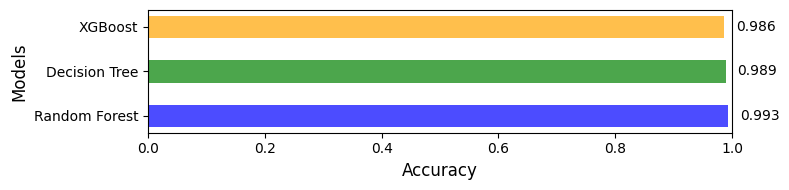

In [ ]:
import matplotlib.pyplot as plt

# Accuracies of the three classifiers
model_names = ['Random Forest', 'Decision Tree', 'XGBoost']
accuracies = [accuracy_rf, accuracy_dt, accuracy_xgb]

# Plotting the bar chart with accuracy on the x-axis and models on the y-axis
plt.figure(figsize=(8, 2))
plt.barh(model_names, accuracies, color=['blue', 'green', 'orange'], alpha=0.7, height=0.5)

# Adding labels and title
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.xlim(0, 1)  # Accuracy is a value between 0 and 1

# Displaying the accuracy values on the bars
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.02, i, f"{acc:.3f}", va='center', fontsize=10)

# Displaying the graph
plt.tight_layout()
plt.show()


In [ ]:
print(fertilizer_data.head(5))

   Temparature  Humidity   Moisture  Soil Type  Crop Type  Nitrogen  \
0           26         52        38          4          3        37   
1           29         52        45          2          8        12   
2           34         65        62          0          1         7   
3           32         62        34          3          9        22   
4           28         54        46          1          6        35   

   Potassium  Phosphorous  Fertilizer Name  
0          0            0                6  
1          0           36                5  
2          9           30                1  
3          0           20                4  
4          0            0                6  


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import numpy as np

# Assume `fertilizer_data` is loaded with the required columns
X = fertilizer_data[['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']]
y = fertilizer_data['Fertilizer Name']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class distribution
print(f"Original class distribution: {Counter(y_train)}")

# Handle imbalance with SMOTE
min_class_size = min(Counter(y_train).values())
k_neighbors = min(5, min_class_size - 1)  # Adjust k_neighbors dynamically
smote = SMOTE(random_state=42, k_neighbors=k_neighbors)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify new class distribution
print(f"Resampled class distribution: {Counter(y_train_smote)}")

# Optionally, add noise to the training data for robustness
noise_factor = 0.01
X_train_smote_noisy = X_train_smote + noise_factor * np.random.randn(*X_train_smote.shape)


Original class distribution: Counter({6: 16, 1: 13, 5: 13, 3: 13, 4: 12, 2: 7, 0: 5})
Resampled class distribution: Counter({1: 16, 4: 16, 0: 16, 2: 16, 5: 16, 6: 16, 3: 16})


In [10]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote_noisy, y_train_smote)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)

# Results
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [11]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=40)
dt_model.fit(X_train_smote_noisy, y_train_smote)

# Evaluate Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Results
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [12]:
# Extreme Gradient Boosting (XGBoost) Classifier
xgb_model = XGBClassifier(objective="multi:softmax", num_class=len(y.unique()), random_state=42)
xgb_model.fit(X_train_smote_noisy, y_train_smote)

# Evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Results
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy}")
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 1.0
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [28]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from collections import Counter

# Assume `fertilizer_data` is loaded with required columns
X = fertilizer_data[['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']]
y = fertilizer_data['Fertilizer Name']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class distribution
print(f"Original class distribution: {Counter(y_train)}")

# Handle imbalance with SMOTE
smote = SMOTE(random_state=42, k_neighbors=min(5, min(Counter(y_train).values()) - 1))
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify new class distribution
print(f"Resampled class distribution: {Counter(y_train_smote)}")


Original class distribution: Counter({6: 16, 1: 13, 5: 13, 3: 13, 4: 12, 2: 7, 0: 5})
Resampled class distribution: Counter({1: 16, 4: 16, 0: 16, 2: 16, 5: 16, 6: 16, 3: 16})


In [29]:
# Random Forest for Feature Selection
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote_noisy, y_train_smote)

# Get feature importance scores
feature_importances = rf_model.feature_importances_

# Select top-k features (e.g., top 5)
top_k = 4
top_k_features_indices = np.argsort(feature_importances)[::-1][:top_k]

# Select only top-k features for training and testing
# Use .iloc for integer-location based indexing on both DataFrames
X_train_selected = X_train_smote_noisy.iloc[:, top_k_features_indices]
X_test_selected = X_test.iloc[:, top_k_features_indices]

print("Selected Features Indices:", top_k_features_indices)

Selected Features Indices: [7 5 6 2]


In [30]:
# Train XGBoost with the selected features
xgb_model = XGBClassifier(objective="multi:softmax", num_class=len(y.unique()), random_state=42)
xgb_model.fit(X_train_selected, y_train_smote)

# Evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test_selected)

# Results
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy with Feature Selection: {xgb_accuracy}")
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy with Feature Selection: 0.95
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.93        20
weighted avg       0.97      0.95      0.96        20



In [ ]:
print(fertilizer_data.columns)
print(crop_data.columns)
print(yield_data.columns)

Index(['Temperature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [ ]:
print(yield_data.shape)

(28242, 8)


In [ ]:
from scipy.stats import boxcox
# Converting Right Skewed data into Normally Distributed data
boxcox(yield_data["pesticides_tonnes"])

yield_data["avg_boxcox"], param = boxcox(yield_data["pesticides_tonnes"])
yield_data["avg_boxcox"].skew()

-0.14159023174487217

In [ ]:
yield_data["pesticides_tonnes"] = yield_data["avg_boxcox"]
yield_data.drop(columns=["avg_boxcox"], inplace=True)

In [ ]:
scores=[]

In [ ]:
#Random Forest Regressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Encode categorical columns
for column in yield_data.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    yield_data[column] = label_encoder.fit_transform(yield_data[column])

# Features and target
X = yield_data.drop('hg/ha_yield', axis=1)  # Replace 'Yield' with the actual target column name
y = yield_data['hg/ha_yield']

# Scale numerical features if needed
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
yield_model = RandomForestRegressor(n_estimators=100, random_state=42)
yield_model.fit(X_train, y_train)

# Make predictions
y_pred_train = yield_model.predict(X_train)
y_pred_test = yield_model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mea = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)



# Print metrics
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Test MEA: {test_mea}')
print(f'R-squared: {r2}')

Train RMSE: 3562.316945575963
Test RMSE: 9697.228356572316
Test MEA: 3489.544768985661
R-squared: 0.987036050406303


In [ ]:
# Decision Tree Regressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Features and target
X_dtr = yield_data.drop('hg/ha_yield', axis=1)  # Replace 'Yield' with the actual target column name
y_dtr = yield_data['hg/ha_yield']

# Scale numerical features if needed
scaler_dtr = MinMaxScaler()
X_scaled_dtr = scaler_dtr.fit_transform(X_dtr)

# Train-test split
X_train_dtr, X_test_dtr, y_train_dtr, y_test_dtr = train_test_split(X_scaled_dtr, y_dtr, test_size=0.2, random_state=42)

# Train the Decision Tree model
yield_model_dtr = DecisionTreeRegressor(random_state=42)
yield_model_dtr.fit(X_train_dtr, y_train_dtr)

# Make predictions
y_pred_train_dtr = yield_model_dtr.predict(X_train_dtr)
y_pred_test_dtr = yield_model_dtr.predict(X_test_dtr)

# Evaluate the model
train_rmse_dtr = np.sqrt(mean_squared_error(y_train_dtr, y_pred_train_dtr))
test_rmse_dtr = np.sqrt(mean_squared_error(y_test_dtr, y_pred_test_dtr))
test_mea_dtr = mean_absolute_error(y_test_dtr, y_pred_test_dtr)
r2_dtr = r2_score(y_test_dtr, y_pred_test_dtr)

# Print metrics
print(f'Decision Tree Regressor - Train RMSE: {train_rmse_dtr}')
print(f'Decision Tree Regressor - Test RMSE: {test_rmse_dtr}')
print(f'Decision Tree Regressor - Test MAE: {test_mea_dtr}')
print(f'Decision Tree Regressor - R-squared: {r2_dtr}')


Decision Tree Regressor - Train RMSE: 0.0
Decision Tree Regressor - Test RMSE: 12904.619684000996
Decision Tree Regressor - Test MAE: 3776.832536732165
Decision Tree Regressor - R-squared: 0.9770420816025899


In [ ]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Features and target
X_gbr = yield_data.drop('hg/ha_yield', axis=1)  # Replace 'hg/ha_yield' with the actual target column name
y_gbr = yield_data['hg/ha_yield']

# Scale numerical features if needed
scaler_gbr = MinMaxScaler()
X_scaled_gbr = scaler_gbr.fit_transform(X_gbr)

# Train-test split
X_train_gbr, X_test_gbr, y_train_gbr, y_test_gbr = train_test_split(X_scaled_gbr, y_gbr, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor model
yield_model_gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
yield_model_gbr.fit(X_train_gbr, y_train_gbr)

# Make predictions
y_pred_train_gbr = yield_model_gbr.predict(X_train_gbr)
y_pred_test_gbr = yield_model_gbr.predict(X_test_gbr)

# Evaluate the model
train_rmse_gbr = np.sqrt(mean_squared_error(y_train_gbr, y_pred_train_gbr))
test_rmse_gbr = np.sqrt(mean_squared_error(y_test_gbr, y_pred_test_gbr))
test_mea_gbr = mean_absolute_error(y_test_gbr, y_pred_test_gbr)
r2_gbr = r2_score(y_test_gbr, y_pred_test_gbr)

# Print metrics
print(f'Gradient Boosting Regressor - Train RMSE: {train_rmse_gbr}')
print(f'Gradient Boosting Regressor - Test RMSE: {test_rmse_gbr}')
print(f'Gradient Boosting Regressor - Test MAE: {test_mea_gbr}')
print(f'Gradient Boosting Regressor - R-squared: {r2_gbr}')


Gradient Boosting Regressor - Train RMSE: 34460.61144241805
Gradient Boosting Regressor - Test RMSE: 34700.03218700305
Gradient Boosting Regressor - Test MAE: 21740.178260954963
Gradient Boosting Regressor - R-squared: 0.8340023868441611


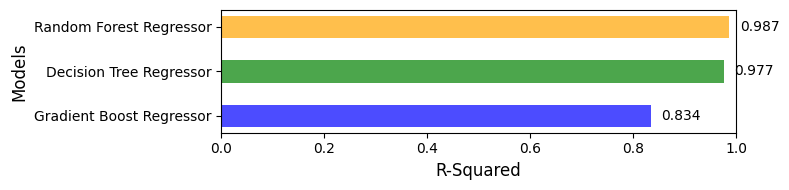

In [ ]:
import matplotlib.pyplot as plt

# Accuracies of the three classifiers
model_names = ['Gradient Boost Regressor', 'Decision Tree Regressor', 'Random Forest Regressor']
accuracies = [r2_gbr, r2_dtr, r2]

# Plotting the bar chart with accuracy on the x-axis and models on the y-axis
plt.figure(figsize=(8, 2))
plt.barh(model_names, accuracies, color=['blue', 'green', 'orange'], alpha=0.7, height=0.5)

# Adding labels and title
plt.xlabel('R-Squared', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.xlim(0, 1)  # Accuracy is a value between 0 and 1

# Displaying the accuracy values on the bars
for i, acc in enumerate(accuracies):
    plt.text(acc + 0.02, i, f"{acc:.3f}", va='center', fontsize=10)

# Displaying the graph
plt.tight_layout()
plt.show()


In [ ]:
print(X.columns)

Index(['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

def agro_advisor_v2(temperature, humidity, ph, rainfall, soil_type, nitrogen, potassium, phosphorus, area, item, year):
    # 1. Recommend Crop
    crop_input = pd.DataFrame(
        [[nitrogen, phosphorus, potassium, temperature, humidity, ph, rainfall]],
        columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
    )
    # Predict crop (ensure the crop_model is trained and used)
    crop = crop.predict(crop_input)
    crop = crop[0]  # Extract scalar if the output is an array
    crop_name = crop_le.inverse_transform([crop])[0]  # Inverse transform to get the crop name

    # 2. Prepare Fertilizer Recommendation Input
    fertilizer_input = pd.DataFrame(
        [[temperature, humidity, 0, soil_type, crop, nitrogen, potassium, phosphorus]],
        columns=['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous']
    )
    # Predict fertilizer (ensure the fertilizer_model is trained and used)
    fertilizer = fertilizer_model.predict(fertilizer_input)
    fertilizer = fertilizer[0]  # Extract scalar if the output is an array
    fertilizer_name = fertilizer_name_le.inverse_transform([fertilizer])[0]  # Inverse transform to get fertilizer name

    # 3. Prepare Yield Prediction Input
    yield_input = pd.DataFrame(
        [[area, item, year, temperature, rainfall, ph]],
        columns=['area', 'item', 'year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
    )
    # Predict yield (ensure the yield_model is trained and used)
    predicted_yield = yield_model.predict(yield_input)
    predicted_yield = predicted_yield[0]  # Extract scalar if the output is an array

    return crop_name, fertilizer_name, predicted_yield


# Input for Crop Recommendation
example_input = {
    "temperature": 30,
    "humidity": 70,
    "ph": 6.5,
    "rainfall": 200,
    "soil_type": 2,  # Coded
    "nitrogen": 50,
    "potassium": 30,
    "phosphorus": 40,
    "area": 100,    # Example value for area
    "item": 1,      # Example value for item (encoded)
    "year": 2023    # Example value for year
}

# Step 1: Get Recommended Crop, Fertilizer, and Predicted Yield by calling the function once
crop, fertilizer, predicted_yield = agro_advisor_v2(
    temperature=example_input["temperature"],
    humidity=example_input["humidity"],
    ph=example_input["ph"],
    rainfall=example_input["rainfall"],
    soil_type=example_input["soil_type"],
    nitrogen=example_input["nitrogen"],
    potassium=example_input["potassium"],
    phosphorus=example_input["phosphorus"],
    area=example_input["area"],
    item=example_input["item"],
    year=example_input["year"]
)

# Print the results
print(f"Recommended Crop: {crop}")
print(f"Recommended Fertilizer: {fertilizer}")
print(f"Predicted Yield: {predicted_yield} hg/ha")


Recommended Crop: mango
Recommended Fertilizer: Urea
Predicted Yield: 165694.2 hg/ha


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
